# 16장. 이미지 인식의 꽃, CNN 익히기

In [15]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys
import os
import tensorflow as tf

seed=0
np.random.seed(seed)
tf.random.set_seed(3)

#MNIST데이터셋 불러오기
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

#정규화
X_train = X_train.reshape(X_train.shape[0], 784).astype('float32')/255
X_test = X_test.reshape(X_test.shape[0], 784).astype('float32')/255

Y_train = to_categorical(Y_train,10) #10(0~9까지있으니 클래스의 갯수10)
Y_test = to_categorical(Y_test, 10)

In [16]:
#모델 프레임 설정
model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()
#모델 실행 환경 설정
model.compile(loss='categorical_crossentropy',  #범주형 교차 엔트로피(10개중 하나여서)
             optimizer='adam',
             metrics=['accuracy'])
#loss 두개일때는 바이너리씀. 3개이상일때 categorical_crossentropy

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 512)               401920    
                                                                 
 dense_7 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [17]:
#모델 저장 폴더 설정
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)  #만일 MODEL_DIR가 없으면 현재 폴더에 만들어주세요
    
#모델 저장조건(베스트모델 저장, 성능좋을때만 기록해 달라.)
modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss',
                              verbose=1, save_best_only = True)
#몇번 돌렸을때 val_loss가 얼마인지 다 저장됨.
#epoch02d 는 2자리(40,50 등), 확장자는 hdf5


early_stopping_callback = EarlyStopping(monitor='val_loss',patience=10)


Epoch 1: val_loss improved from inf to 0.14746, saving model to ./model\01-0.1475.hdf5

Epoch 2: val_loss improved from 0.14746 to 0.10219, saving model to ./model\02-0.1022.hdf5

Epoch 3: val_loss improved from 0.10219 to 0.08872, saving model to ./model\03-0.0887.hdf5

Epoch 4: val_loss improved from 0.08872 to 0.07861, saving model to ./model\04-0.0786.hdf5

Epoch 5: val_loss improved from 0.07861 to 0.07326, saving model to ./model\05-0.0733.hdf5

Epoch 6: val_loss improved from 0.07326 to 0.06730, saving model to ./model\06-0.0673.hdf5

Epoch 7: val_loss improved from 0.06730 to 0.06538, saving model to ./model\07-0.0654.hdf5

Epoch 8: val_loss improved from 0.06538 to 0.06217, saving model to ./model\08-0.0622.hdf5

Epoch 9: val_loss did not improve from 0.06217

Epoch 10: val_loss did not improve from 0.06217

Epoch 11: val_loss did not improve from 0.06217

Epoch 12: val_loss did not improve from 0.06217

Epoch 13: val_loss improved from 0.06217 to 0.06013, saving model to ./m

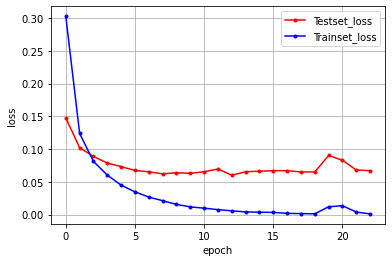

In [18]:
#모델의 실행
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30, 
                    batch_size=200, verbose=0, callbacks=[early_stopping_callback,checkpointer])

print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

#테스트 셋의 오차
y_vloss = history.history['val_loss']

#학습셋의 오차
y_loss = history.history['loss']

#그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')

#그래프에 그리드를 주고 레이블 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

* 과적합 되기전 멈춤